# Asignacion 2

## Reconocimiento de patrones
## Alejandro Bermudez
## Junio 17

Base de datos:

Los datos están relacionados con las campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

Dataset can be found: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
# Importar las librerias o paquetes que necesitemos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
# Lo primero que hay que hacer es cargar el dataset

# Hay 2 formas de hacer esto, la primera es descargar la base de datos, encontrar una ruta y luego cargarla en el notebook:

## Definiendo el directorio

dataset= pd.read_csv('bank-full.csv', sep=";")

# Análisis exploratorio de los datos

Poner aqui algo

In [3]:
dataset.shape

(45211, 17)

In [4]:
# Veamos la cabecera del conjunto de datos.
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# En este caso, la variable de destino es básicamente una clasificación codificada, veamos qué otros valores tienen "y"

dataset['y'].unique()


array(['no', 'yes'], dtype=object)

In [6]:
# A este punto ya se entiende que se trata de un caso de clasificacion, donde la variable a predecir es "y" la cual significa :
# has the client subscribed a term deposit? 
# Un punto muy importante es saber si las clases de la variable a clasificar se encuentran balanceadas, que se quiere decir con
# eso ,bueno que exista una proporcion parecida de las clases 60% y , 40% n por ejemplo

dataset['y'].value_counts()


no     39922
yes     5289
Name: y, dtype: int64

### Al parecer las clases no se encuentran balanceadas, por ende se tendra que utilizar una metrica para el modelo diferente al accuracy

In [7]:
# Pero primero, veamos un resumen del conjunto de datos, la función de descripción nos permitirá hacer eso
# La funcion "describe" nos permitirá tener algunas estadísticas del conjunto de datos, en este caso, la variable de "y" no necesita
# este tipo de estadísticas ya que es una variable categórica codificada

dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Ahora, veamos si faltan algunos valores en las columnas

dataset.isnull().sum()



age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Parece que no faltan valores, en caso de que necesite limpiarlos, por favor repasar el tutorial anterior o mire este código: Primero puedes eliminar filas de valores na con:

In [9]:
dataset=dataset.dropna ()


# Hay alguna correlacion entre la edad y la variable de salida?


Text(0.5, 0, 'Mean age ')

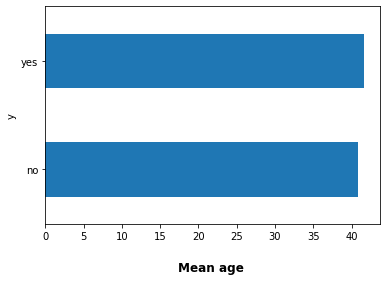

In [10]:
# Para realizar esto lo primero que se realizara es un grafico con la edad promedio para yes y para no

mean_age_predictor = dataset.groupby('y')['age'].mean().sort_values()



mean_age_plot=mean_age_predictor.plot(kind='barh')

mean_age_plot.set_xlabel("Mean age ", labelpad=20, weight='bold', size=12)

### Parece ser que la edad no es un factor predictor para saber si el cliente se ha suscrito a un deposito a plazo, granulemos un poco mas y veamos un histograma

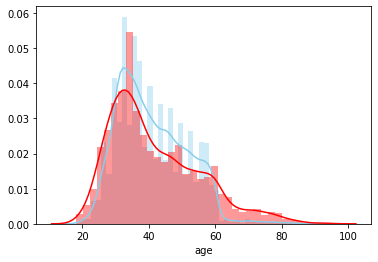

In [11]:
sns.distplot( dataset[dataset['y']=='no'].age , color="skyblue", label="No")
sns.distplot( dataset[dataset['y']=='yes'].age , color="red", label="Yes")



### Las distribuciones parecen ser bastante iguales, aunque al final de la cola derecha cambia un poco, entonces podria ser un buen feature


## Veamos si el estado civil parece ser un buen feature

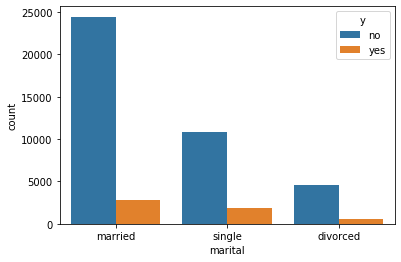

In [12]:
ax = sns.countplot(x="marital", hue="y", data=dataset)

### Tampoco existe una relacion visible entre en estado civil y si se ha suscrito a un deposito a plazo

## Seleccion de columnas

### Para esta seccion se va a utilizar la instancia de feature selector, pero antes de eso tenemos que realizar un poco de Pre-procesamiento

One Hot enconder es codificar entidades enteras "categóricas" como un array numérico de un solo uso

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

#Definiendo quien es "X" y quien es "Y"

X=dataset.iloc[:,:-1]

y=dataset.iloc[:,16]

# Label encoder en variable X:

X.iloc[:,1]=le.fit_transform(X.iloc[:,1])
X.iloc[:,2]=le.fit_transform(X.iloc[:,2])
X.iloc[:,3]=le.fit_transform(X.iloc[:,3])
X.iloc[:,4]=le.fit_transform(X.iloc[:,4])
X.iloc[:,6]=le.fit_transform(X.iloc[:,6])
X.iloc[:,7]=le.fit_transform(X.iloc[:,7])
X.iloc[:,8]=le.fit_transform(X.iloc[:,8])
X.iloc[:,10]=le.fit_transform(X.iloc[:,10])
X.iloc[:,15]=le.fit_transform(X.iloc[:,15])



# aqui se escifica las columnas que se deben hacer one hot label encoding y deben de ser columnas categoricas
onehotencoder=OneHotEncoder(categorical_features=[1,2,3,4,6,7,8,10,15])
X= onehotencoder.fit_transform(X).toarray()

X=pd.DataFrame(X)



X.columns = ["is_admin", "is_blue_collar", "is_entrepe",
               "is_housemaid","is_management","is_retired",
               "is_self","is_services","is_student","is_tech",
               "is_unemp","is_unknown","is_divorced",
               "is_married","is_single","is_primary",
               "is_secondary","is_tertiary","is_unknown_edu",
               "is_y_def","is_n_def","is_y_hou","is_n_hou",
               "is_y_loan","is_n_loan","is_cellular",
               "is_telephone","is_unknown_contact",
               "is_apr","is_aug","is_dec","is_feb",
               "is_jan","is_july","is_june",
               "is_march","is_may","is_nov",
               "is_oct","is_sep","is_failure_out",
               "is_other_out","is_sucess_out","is_unknown_out",
               "age","balance","day","duration","campaign","pdays","previous"]




C:\Users\bermudal\AppData\Local\Continuum\miniconda3\envs\Inv-Corta-2.ipynb\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\bermudal\AppData\Local\Continuum\miniconda3\envs\Inv-Corta-2.ipynb\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Asi se ven las variables listas despues de codificarlas

In [14]:

X.head()


,is_admin,is_blue_collar,is_entrepe,is_housemaid,is_management,is_retired,is_self,is_services,is_student,is_tech,...,is_other_out,is_sucess_out,is_unknown_out,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33.0,1.0,5.0,198.0,1.0,-1.0,0.0


### Ahora hay que quitar la ultima columna de cada variable que se codifico

- is_unknown
- is_single
- is_unknown_edu
- is_n_def
- is_n_hou
- is_n_loan
- is_unknown_contact
- is_sep
- is_unknown_out

In [15]:
columns = ['is_unknown', 'is_single',
           'is_unknown_edu','is_n_def',
           'is_n_hou','is_n_loan',
           'is_unknown_contact','is_sep',
           'is_unknown_out']
X.drop(columns, inplace=True, axis=1)

In [16]:
X.head()

,is_admin,is_blue_collar,is_entrepe,is_housemaid,is_management,is_retired,is_self,is_services,is_student,is_tech,...,is_failure_out,is_other_out,is_sucess_out,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.0,1.0,5.0,198.0,1.0,-1.0,0.0


### Muchos algoritmos son sensibles si los datos no se encuentran normalizados por ende vamos a normalizar todo para entrenar a los modelos con standar_scaler

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [18]:
X_scaled

array([[-0.35936869, -0.52373954, -0.1844147 , ..., -0.56935064,
        -0.41145311, -0.25194037],
       [-0.35936869, -0.52373954, -0.1844147 , ..., -0.56935064,
        -0.41145311, -0.25194037],
       [-0.35936869, -0.52373954,  5.42256115, ..., -0.56935064,
        -0.41145311, -0.25194037],
       ...,
       [-0.35936869, -0.52373954, -0.1844147 , ...,  0.72181052,
         1.43618859,  1.05047333],
       [-0.35936869,  1.909346  , -0.1844147 , ...,  0.39902023,
        -0.41145311, -0.25194037],
       [-0.35936869, -0.52373954,  5.42256115, ..., -0.24656035,
         1.4761376 ,  4.52357654]])

In [19]:
# Ahora vamos a cambiar la variable "Y"

In [20]:
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

# Exploración de modelos de aprendizaje

## Para seleccionar los features se realizara un modelo de random forest

In [22]:

# ahora si se realizara el random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

classifierRF= RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=6)
classifierRF = classifierRF.fit(X, y)
# imprimir arry de importancia 
importance=classifierRF.feature_importances_  
importance=pd.DataFrame(importance)

importance=importance.transpose()

importance.columns = ["is_admin", "is_blue_collar", "is_entrepe",
               "is_housemaid","is_management","is_retired",
               "is_self","is_services","is_student","is_tech",
               "is_unemp","is_divorced",
               "is_married","is_primary",
               "is_secondary","is_tertiary",
               "is_y_def","is_y_hou",
               "is_y_loan","is_cellular",
               "is_telephone",
               "is_apr","is_aug","is_dec","is_feb",
               "is_jan","is_july","is_june",
               "is_march","is_may","is_nov",
               "is_oct","is_failure_out",
               "is_other_out","is_sucess_out",
               "age","balance","day","duration","campaign","pdays","previous"]

importance.head()



,is_admin,is_blue_collar,is_entrepe,is_housemaid,is_management,is_retired,is_self,is_services,is_student,is_tech,...,is_failure_out,is_other_out,is_sucess_out,age,balance,day,duration,campaign,pdays,previous
0,0.000648,0.003551,0.000421,0.000325,0.00086,0.003676,0.000406,0.000491,0.005589,0.000729,...,0.018215,0.004806,0.200312,0.05225,0.012726,0.012844,0.392121,0.007027,0.06075,0.040304


In [23]:
# antes la dimension de los datos era:
X.shape

(45211, 42)

In [24]:
# Ahora la nueva dimension es:
model = SelectFromModel(classifierRF, prefit=True)
X_new = model.transform(X)
X_new.shape 

(45211, 8)

In [25]:
# Antes de esto vamos a hacer split del dataset en test y train 80% training y 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 0)

### Al parecer solo hay 8 variables importantes de las 50

# RANDOM FOREST

### Evaluemos la precision de random forest, este utilizara grid search, como modo de busqueda para optimizar el accuracy y ademas validacion cruzada, para temas de generalizacion del algoritmo, que se quiere decir con eso? que el algoritmo sea capaz de predecir en test con la misma precision que se hizo en train
Link usado para observar los parametros: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

In [26]:
from sklearn.model_selection import GridSearchCV

classifierRF= RandomForestClassifier()

parameters=[ {'criterion':['gini'], 'n_estimators' : [1500,2000], 
             'max_depth':[6,8,10],
             'max_features':[2,4,6] }]

grid_search=GridSearchCV(estimator=classifierRF,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=3)
#Pasemos los datos de training
grid_search=grid_search.fit(X_train ,y_train)


In [27]:
# best accuracy

(grid_search.best_score_)*100

90.34505640345057

In [28]:
# mejores parametros

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'n_estimators': 2000}

In [29]:
# accuracy en test
from sklearn.metrics import accuracy_score


y_predict= grid_search.best_estimator_.predict(X_test)

accuracy_score(y_test,y_predict)

0.9009178370009953

### El ajuste con este método funciona bien con 2000 estimadores y profundidad 10 cada uno. Se puede notar como el modelo no tiene underfitting lo cual significa que es bueno prediciendo nuevos datos y ademas, tiene un muy buen accuracy el cual es 90%

# Logistic Regression

Link usado para observar los parametros: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

classifierLR= LogisticRegression()


parametersLR=[ {'C':[0.5,0.6,0.7,1.0], 
             'penalty' : ['l1','l2'], 
              'solver':['liblinear']}]

grid_searchLR=GridSearchCV(estimator=classifierLR,
                         param_grid=parametersLR,
                         scoring='accuracy',
                         cv=3)

grid_searchLR=grid_searchLR.fit(X_train ,y_train)

In [31]:
# mejores parametros usados

grid_searchLR.best_params_

{'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}

In [32]:
#best accuracy

(grid_searchLR.best_score_)*100

90.20128290201282

In [33]:
# test accuracy
from sklearn.metrics import accuracy_score

y_predict= grid_searchLR.best_estimator_.predict(X_test)
accuracy_score(y_test,y_predict)

0.8933982085591065

### Se puede notar como el modelo no tiene underfitting lo cual significa que es bueno prediciendo nuevos datos y ademas, tiene un muy buen accuracy el cual es 90%

# Gaussian Naive Bayes

GaussianNB que corresponde al clasificador NB Gaussiano 

In [34]:
from sklearn.naive_bayes import GaussianNB
# Para este modelo no se realizara gridsearch ya que el modelo por si solo tiene muy pocos parametros

from sklearn.model_selection import GridSearchCV

classifierNB= GaussianNB()

classifierNB.fit(X_train ,y_train)

from sklearn.metrics import accuracy_score

# accuracy en train

y_predict= classifierNB.predict(X_train)
accuracy_score(y_train,y_predict)


0.8965660252156602

In [35]:
# accuracy en test 

from sklearn.metrics import accuracy_score

y_predict= classifierNB.predict(X_test)
accuracy_score(y_test,y_predict)

0.892734711931881

### Este clasificador no se le agregó ninguna clase de prior knowledge. Su rendimiento como clasificación es buena, pero no tan buena como los clasificadores anteriores.
### Se puede notar como el modelo no tiene underfitting lo cual significa que es bueno prediciendo nuevos datos y ademas, tiene un muy buen accuracy el cual es 89%

# Decision Trees

Procedemos como en el casos anteriores, para más detalles sobre LDecision Trees referirse a: http://scikit-learn.org/stable/modules/tree.html

Se llama a la libreria DecisionTreeClassifier, se llama la a DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

classifierDT= DecisionTreeClassifier()


parametersDT=[ {'criterion':['gini'],  
             'max_depth':[4,6,8],
             'max_features':[2,4,6] }]

grid_searchDT=GridSearchCV(estimator=classifierDT,
                         param_grid=parametersDT,
                         scoring='accuracy',
                         cv=3)

grid_searchDT=grid_searchDT.fit(X_train ,y_train)


In [37]:
# mejores parametros usados

grid_searchDT.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 6}

In [38]:
#best accuracy

(grid_searchDT.best_score_)*100

90.14045565140457

In [39]:
# test accuracy
from sklearn.metrics import accuracy_score

y_predict= grid_searchDT.best_estimator_.predict(X_test)
accuracy_score(y_test,y_predict)

0.8954992812119872

### Este método se ajusto para una profundidad de 6 preguntas. De otra forma se podria apreciar un overfitting o underfitting. Se puede notar como el modelo no tiene underfitting lo cual significa que es bueno prediciendo nuevos datos y ademas, tiene un muy buen accuracy el cual es 90%

# XGBOOST (Ensamble)

### Algunos de los principales beneficios de XGBoost son que es altamente escalable, paralelizable, rápido de ejecutar y, por lo general, realiza otros algoritmos.
 Este modelo tiene muchos parametros, es muy bueno pero ens muy dificil de optimizar


In [ ]:

import xgboost as xgb

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

classifierXG= XGBClassifier()


parametersXG=[ {'max_depth': [5,7,9], 
                'min_child_weight': [1,3,5],
               'n_estimators': [1000,1500]}]

grid_searchXG=GridSearchCV(estimator=classifierXG,
                         param_grid=parametersXG,
                         scoring='accuracy',
                         cv=3)

grid_searchXG=grid_searchXG.fit(X_train ,y_train)


In [ ]:
# mejores parametros usados

grid_searchXG.best_params_

In [ ]:
#best accuracy

(grid_searchXG.best_score_)*100

In [ ]:
# test accuracy
from sklearn.metrics import accuracy_score

y_predict= grid_searchXG.best_estimator_.predict(X_test)
accuracy_score(y_test,y_predict)

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

classifierSVC= SVC()


parametersSVC=[ {'kernel': ['rbf','poly']}]

grid_searchSVC=GridSearchCV(estimator=classifierSVC,
                         param_grid=parametersSVC,
                         scoring='accuracy',
                         cv=3)

grid_searchSVC=grid_searchSVC.fit(X_train ,y_train)


In [ ]:
# mejores parametros usados

grid_searchSVC.best_params_

In [ ]:
#best accuracy

(grid_searchSVC.best_score_)*100

In [ ]:
# test accuracy
from sklearn.metrics import accuracy_score

y_predict= grid_searchSVC.best_estimator_.predict(X_test)
accuracy_score(y_test,y_predict)

# Conclusiones

1- De acuerdo a estos resultados, el EDA y el pre procesamiento de los datos utilizando OneHotEncoder, Standar Scaling y la seleccion de fetures usando el random forest han sido muy exitoso para mejorar el rendimiento computacional de los algoritmos de clasificación.

2- De los múltiples modelos de aprendizaje, los que obtuvieron mejores resultados a corto plazo y mayoritariamente, fueron Random forest y Decision tree. Debido a que el problema a resolver es de clasificacion, y estos algoritmos aplican preguntas.